<a href="https://www.kaggle.com/code/albertobircoci/k-nearest-neighbors?scriptVersionId=254300064" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# K-Nearest Neighbors

🧠 Project Overview
This project explores various implementations and optimizations of the K-Nearest Neighbors (KNN) algorithm on a dataset containing 1000 student records. The goal is to classify students into three performance categories based on their average scores.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, LocalOutlierFactor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## ⚙️ Preprocessing

In [2]:
df['gender'] = df['gender'].map({'female': 0, 'male': 1})
df['gender'].value_counts()

gender
0    518
1    482
Name: count, dtype: int64

In [3]:
mapping = {'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4}
df['race/ethnicity'] = df['race/ethnicity'].map(mapping)
df['race/ethnicity'].value_counts()

race/ethnicity
2    319
3    262
1    190
4    140
0     89
Name: count, dtype: int64

In [4]:
education_mapping = {
    'some high school': 0,
    'high school': 1,
    'some college': 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
df['parental level of education'] = df['parental level of education'].map(education_mapping)
df['parental level of education'].value_counts()

parental level of education
2    226
3    222
1    196
0    179
4    118
5     59
Name: count, dtype: int64

In [5]:
lunch_mapping = {
    'free/reduced': 0,
    'standard': 1
}
df['lunch'] = df['lunch'].map(lunch_mapping)
df['lunch'].value_counts()

lunch
1    645
0    355
Name: count, dtype: int64

In [6]:
test_prep_mapping = {
    'none': 0,
    'completed': 1
}
df['test preparation course'] = df['test preparation course'].map(test_prep_mapping)
df['test preparation course'].value_counts()

test preparation course
0    642
1    358
Name: count, dtype: int64

In [7]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

def categorize(score):
    if score < 60:
        return 0
    elif score < 80:
        return 1
    else:
        return 2

df['math category'] = df['math score'].apply(categorize)
df['reading category'] = df['reading score'].apply(categorize)
df['writing category'] = df['writing score'].apply(categorize)
df['average category'] = df['average score'].apply(categorize)

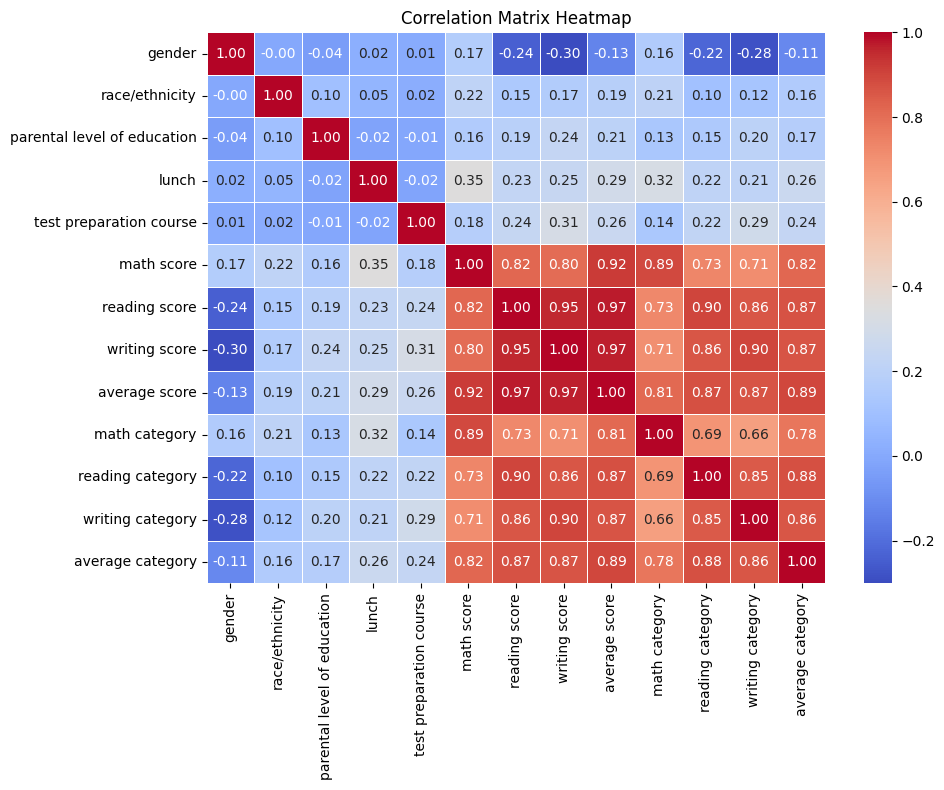

In [8]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

# # 🔍 KNN Experiments


In [9]:
features = df.drop(columns=['math category', 'reading category', 'writing category', 'average category', 'average score'])
target = df['average score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² score: 0.9916283587132757
MSE: 1.7946000000000015


In [10]:
features_all = df.drop(columns=['average score', 'average category'])
target = df['average category']

X_train, X_test, y_train, y_test = train_test_split(features_all, target, test_size=0.2, random_state=42)

model_all = KNeighborsClassifier(n_neighbors=5)
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)

print("Model 1 - All features")
print(classification_report(y_test, y_pred_all, digits=4))


Model 1 - All features
              precision    recall  f1-score   support

           0     0.9385    0.9839    0.9606        62
           1     0.9717    0.9626    0.9671       107
           2     1.0000    0.9355    0.9667        31

    accuracy                         0.9650       200
   macro avg     0.9701    0.9607    0.9648       200
weighted avg     0.9658    0.9650    0.9650       200



In [11]:
features_no_cat = df.drop(columns=['average score', 'average category', 'math category', 'reading category', 'writing category'])
target = df['average category']

X_train, X_test, y_train, y_test = train_test_split(features_no_cat, target, test_size=0.2, random_state=42)

model_no_cat = KNeighborsClassifier(n_neighbors=5)
model_no_cat.fit(X_train, y_train)
y_pred_no_cat = model_no_cat.predict(X_test)

print("Model 2 - No category columns")
print(classification_report(y_test, y_pred_no_cat, digits=4))


Model 2 - No category columns
              precision    recall  f1-score   support

           0     0.9385    0.9839    0.9606        62
           1     0.9717    0.9626    0.9671       107
           2     1.0000    0.9355    0.9667        31

    accuracy                         0.9650       200
   macro avg     0.9701    0.9607    0.9648       200
weighted avg     0.9658    0.9650    0.9650       200



In [12]:
features_no_scores = df.drop(columns=['average score', 'average category', 'math score', 'reading score', 'writing score'])
target = df['average category']

X_train, X_test, y_train, y_test = train_test_split(features_no_scores, target, test_size=0.2, random_state=42)

model_no_scores = KNeighborsClassifier(n_neighbors=5)
model_no_scores.fit(X_train, y_train)
y_pred_no_scores = model_no_scores.predict(X_test)

print("Model 3 - No score columns")
print(classification_report(y_test, y_pred_no_scores, digits=4))


Model 3 - No score columns
              precision    recall  f1-score   support

           0     0.9655    0.9032    0.9333        62
           1     0.9000    0.9252    0.9124       107
           2     0.8125    0.8387    0.8254        31

    accuracy                         0.9050       200
   macro avg     0.8927    0.8891    0.8904       200
weighted avg     0.9067    0.9050    0.9054       200



## Distance metrics: Euclidean, Manhattan, Minkowski

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features_no_scores, target, test_size=0.2, random_state=42)

# Model 1: Euclidean distance
model_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_euclidean.fit(X_train, y_train)
y_pred_euclidean = model_euclidean.predict(X_test)
print("KNN - Euclidean Distance")
print(classification_report(y_test, y_pred_euclidean, digits=4))

# Model 2: Manhattan distance
model_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
model_manhattan.fit(X_train, y_train)
y_pred_manhattan = model_manhattan.predict(X_test)
print("KNN - Manhattan Distance")
print(classification_report(y_test, y_pred_manhattan, digits=4))

# Model 3: Minkowski distance
model_minkowski = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3)
model_minkowski.fit(X_train, y_train)
y_pred_minkowski = model_minkowski.predict(X_test)
print("KNN - Minkowski Distance (p=3)")
print(classification_report(y_test, y_pred_minkowski, digits=4))


KNN - Euclidean Distance
              precision    recall  f1-score   support

           0     0.9655    0.9032    0.9333        62
           1     0.9000    0.9252    0.9124       107
           2     0.8125    0.8387    0.8254        31

    accuracy                         0.9050       200
   macro avg     0.8927    0.8891    0.8904       200
weighted avg     0.9067    0.9050    0.9054       200

KNN - Manhattan Distance
              precision    recall  f1-score   support

           0     0.9655    0.9032    0.9333        62
           1     0.9000    0.9252    0.9124       107
           2     0.8125    0.8387    0.8254        31

    accuracy                         0.9050       200
   macro avg     0.8927    0.8891    0.8904       200
weighted avg     0.9067    0.9050    0.9054       200

KNN - Minkowski Distance (p=3)
              precision    recall  f1-score   support

           0     0.9655    0.9032    0.9333        62
           1     0.9000    0.9252    0.9124     

## Grid Search: for optimal k selection

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features_no_scores, target, test_size=0.2, random_state=42)

results = []
for k in range(2, 21):
    model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({'n_neighbors': k, 'accuracy': f"{acc:.4f}"})

pd.set_option('display.precision', 9)
results_df = pd.DataFrame(results)
print(results_df)

    n_neighbors accuracy
0             2   0.8450
1             3   0.8800
2             4   0.8700
3             5   0.9050
4             6   0.9000
5             7   0.9100
6             8   0.8900
7             9   0.9000
8            10   0.9050
9            11   0.9050
10           12   0.9150
11           13   0.9150
12           14   0.9150
13           15   0.9150
14           16   0.9250
15           17   0.9150
16           18   0.9050
17           19   0.9100
18           20   0.9100


## Weighted KNN/Tree-based optimizations

In [15]:
results = []

# Weighted KNN
model_weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)
results.append({'model': 'Weighted KNN', 'accuracy': f"{acc_weighted:.4f}"})

# Ball Tree KNN
model_balltree = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
model_balltree.fit(X_train, y_train)
y_pred_balltree = model_balltree.predict(X_test)
acc_balltree = accuracy_score(y_test, y_pred_balltree)
results.append({'model': 'Ball Tree KNN', 'accuracy': f"{acc_balltree:.4f}"})

pd.set_option('display.precision', 9)
results_df = pd.DataFrame(results)
print(results_df)


           model accuracy
0   Weighted KNN   0.8900
1  Ball Tree KNN   0.9050


## Approximate Nearest Neighbors (ANN)

In [16]:
from annoy import AnnoyIndex

X_train, X_test, y_train, y_test = train_test_split(features_no_scores, target, test_size=0.2, random_state=42)
f = X_train.shape[1]
ann_index = AnnoyIndex(f, 'euclidean')
for i in range(len(X_train)):
    ann_index.add_item(i, X_train.iloc[i].tolist())

ann_index.build(10) 
k = 5
y_pred = []
for x in X_test.values:
    neighbors = ann_index.get_nns_by_vector(x.tolist(), k)
    neighbor_labels = y_train.iloc[neighbors].values
    pred = np.bincount(neighbor_labels).argmax()
    y_pred.append(pred)
acc = accuracy_score(y_test, y_pred)
print(f"ANN-based KNN Accuracy: {acc:.4f}")


ANN-based KNN Accuracy: 0.9000


## KNN + SVM Hybrid Model

In [17]:
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
nn = NearestNeighbors(n_neighbors=5)
nn.fit(X_train_scaled)
indices = nn.kneighbors(X_test_scaled, return_distance=False)

X_train_subset = X_train.iloc[indices.flatten()]
y_train_subset = y_train.iloc[indices.flatten()]

svm_model = SVC(kernel='rbf')
svm_model.fit(scaler.fit_transform(X_train_subset), y_train_subset)

y_pred_svm = svm_model.predict(X_test_scaled)

print("Model KNN-filtered SVM")
print(classification_report(y_test, y_pred_svm, digits=4))


Model KNN-filtered SVM
              precision    recall  f1-score   support

           0     0.9667    0.9355    0.9508        62
           1     0.8929    0.9346    0.9132       107
           2     0.8214    0.7419    0.7797        31

    accuracy                         0.9050       200
   macro avg     0.8937    0.8707    0.8812       200
weighted avg     0.9047    0.9050    0.9042       200

